<a href="https://colab.research.google.com/github/hamzan63016/Spamming_email/blob/main/Spam_Email.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv("Spamming_email.csv")
print(df)

     Target                                                Msg
0       ham  Go until jurong point, crazy.. Available only ...
1       ham                      Ok lar... Joking wif u oni...
2      spam  Free entry in 2 a wkly comp to win FA Cup fina...
3       ham  U dun say so early hor... U c already then say...
4       ham  Nah I don't think he goes to usf, he lives aro...
...     ...                                                ...
5567   spam  This is the 2nd time we have tried 2 contact u...
5568    ham              Will Ã¼ b going to esplanade fr home?
5569    ham  Pity, * was in mood for that. So...any other s...
5570    ham  The guy did some bitching but I acted like i'd...
5571    ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [ ]:
df.sample(5)

,Target,Msg
5087,ham,"Good morning, im suffering from fever and dyse..."
4264,ham,Den only weekdays got special price... Haiz......
150,ham,Sindu got job in birla soft ..
959,ham,My sort code is and acc no is . The bank is n...
1767,spam,SMS AUCTION You have won a Nokia 7250i. This i...


In [ ]:
df.shape

(5572, 2)

**Clean data**

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  5572 non-null   object
 1   Msg     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
df['Target']=encoder.fit_transform(df['Target'])

In [ ]:
df.head()

,Target,Msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.duplicated().sum()

np.int64(415)

In [ ]:
df=df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:
df.shape

(5157, 2)

**EDA**

In [ ]:
df.head()

,Target,Msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['Target'].value_counts()

,count
Target,
0,4516
1,641


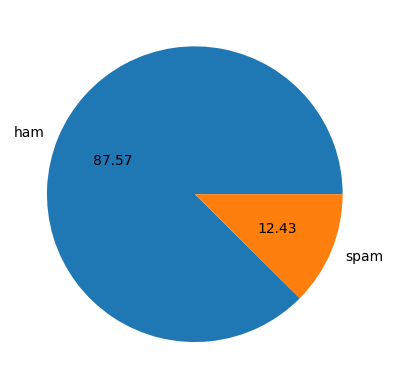

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
!pip install nltk

In [ ]:
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [ ]:
df['num_char']=df['Msg'].apply(len)

In [ ]:
df.head()

,Target,Msg,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
nltk.download('punkt_tab')
df['num_word']=df['Msg'].apply(lambda x:len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
df.head()

,Target,Msg,num_char,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['num_sen']=df['Msg'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,Target,Msg,num_char,num_word,num_sen
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df['num_sen']=df['Msg'].apply(lambda x:len(nltk.sent_tokenize(x)))
df[['num_char','num_word','num_sen']].describe()

,num_char,num_word,num_sen
count,5157.000000,5157.000000,5157.000000
mean,79.228040,18.565639,1.969750
std,58.451149,13.419942,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['Target']==0][['num_char','num_word','num_sen']].describe()

,num_char,num_word,num_sen
count,4516.000000,4516.000000,4516.000000
mean,70.951063,17.273472,1.827724
std,56.730031,13.604143,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['Target']==1][['num_char','num_word','num_sen']].describe()

,num_char,num_word,num_sen
count,641.000000,641.000000,641.000000
mean,137.541342,27.669267,2.970359
std,30.516111,7.104343,1.485575
min,7.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_char', ylabel='Count'>

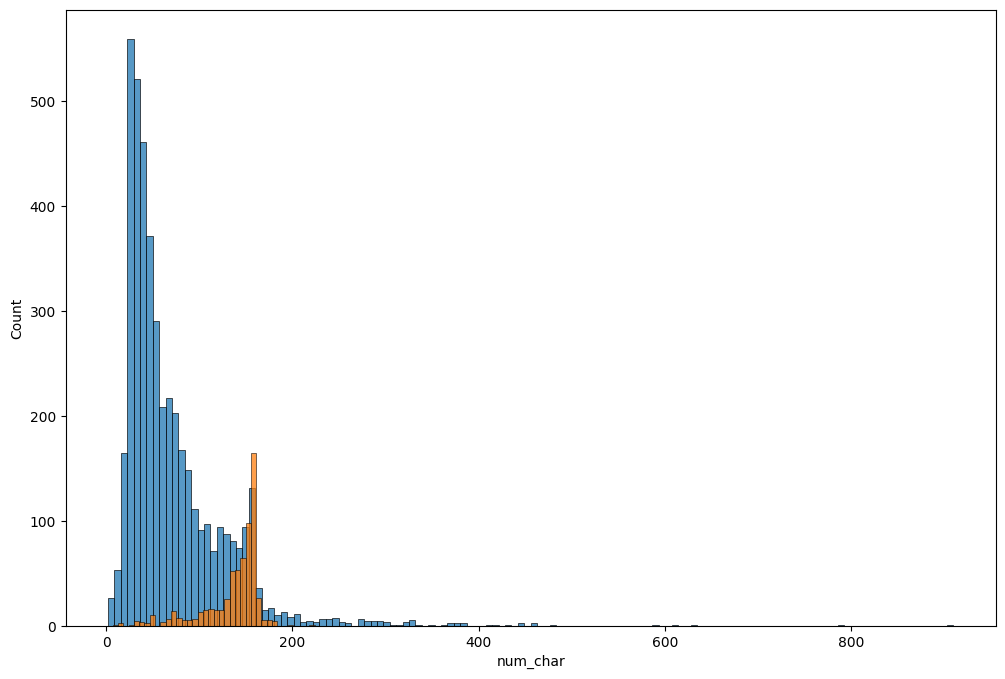

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.histplot(df[df['Target']==0]['num_char'])
sns.histplot(df[df['Target']==1]['num_char'])

<Axes: xlabel='num_word', ylabel='Count'>

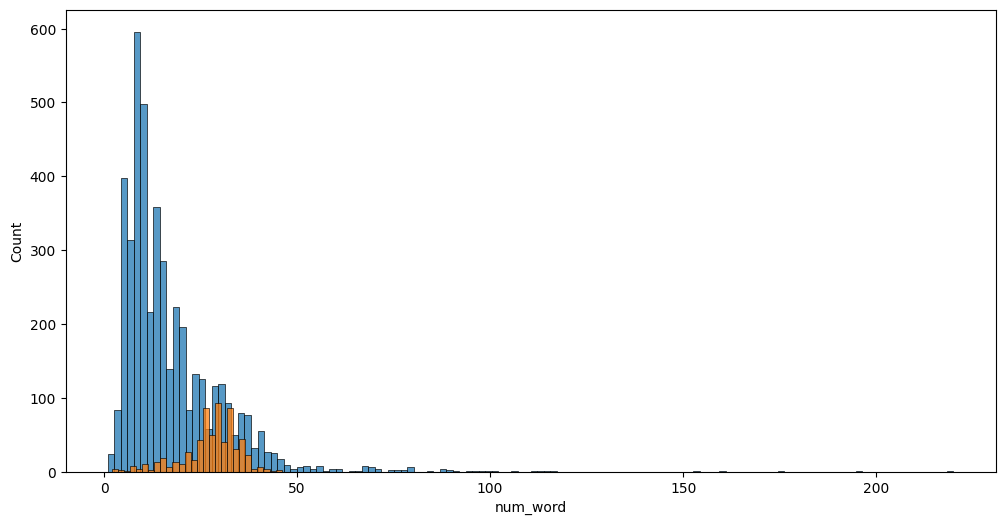

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_word'])
sns.histplot(df[df['Target']==1]['num_word'])

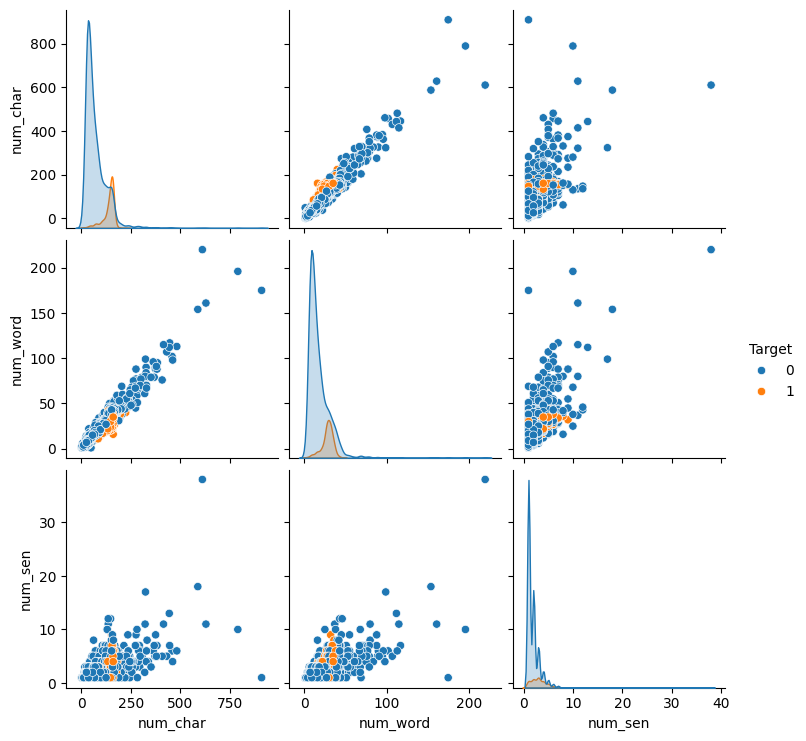

In [ ]:
sns.pairplot(df,hue='Target')

<Axes: >

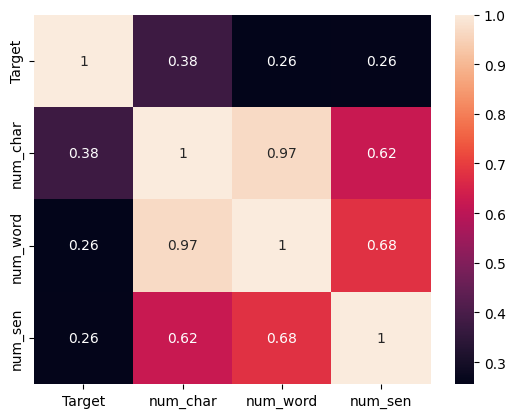

In [ ]:
sns.heatmap(df[['Target','num_char','num_word','num_sen']].corr(),annot=True)

In [ ]:
def tranfrom_message(Message):
  text=Message.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
      if i.isalnum():
          y.append(i)
  text= y[:]
  y.clear()


  for i in text:
      if i not in stopwords.words('english') and i not in string.punctuation:
          y.append(i)
  text= y[:]
  y.clear()

  for i in text:
      y.append(ps.stem(i))
  return " ".join(y)

In [ ]:
ps.stem('dancing')
ps.stem('dining')

'dine'

In [ ]:
df['Msg'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [ ]:
def transform_message(text):
    return text

transform_message("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")
df['transform_message'] = df['Msg'].apply(transform_message)
df.head()

,Target,Msg,num_char,num_word,num_sen,transform_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...,29,8,2,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.head()

,Target,Msg,num_char,num_word,num_sen,transform_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...,29,8,2,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc=wc.generate(df[df['Target']==1]['transform_message'].str.cat(sep=" "))

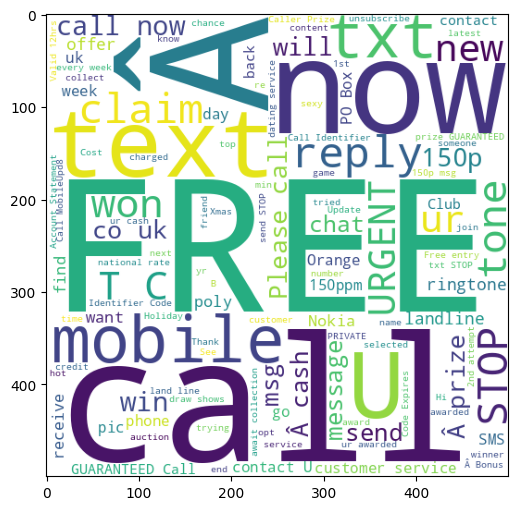

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc=wc.generate(df[df['Target']==0]['transform_message'].str.cat(sep=" "))

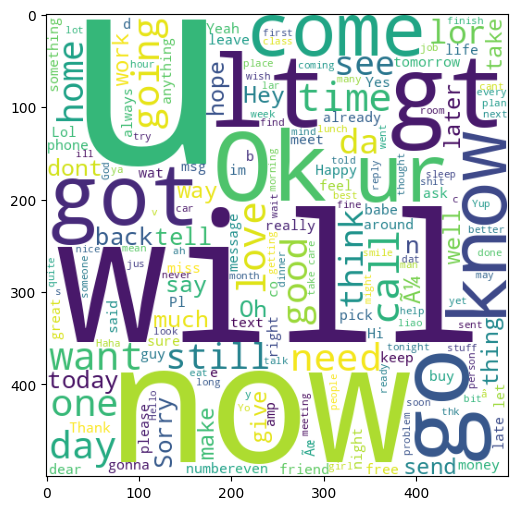

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
df.head()

,Target,Msg,num_char,num_word,num_sen,transform_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...,29,8,2,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
spam_corpus = []
for msg in df[df['Target'] == 1]['transform_message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

15166

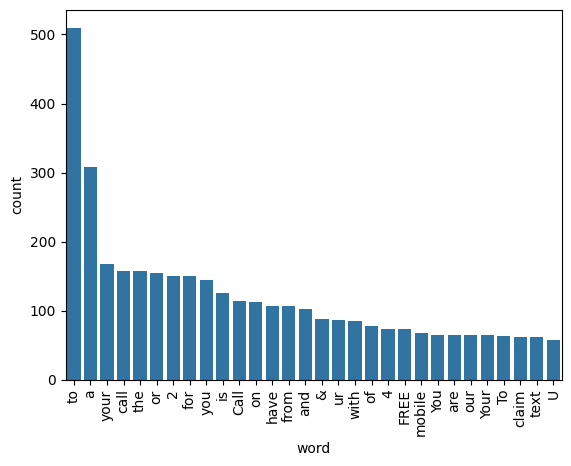

In [ ]:
from collections import Counter
spam_words_counts = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=spam_words_counts)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['Target'] == 0]['transform_message'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

len(ham_corpus)

64307

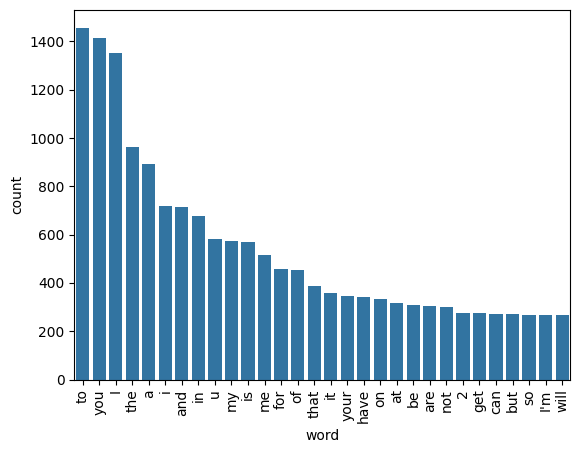

In [ ]:
ham_words_counts = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=ham_words_counts)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df.head()

,Target,Msg,num_char,num_word,num_sen,transform_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...,29,8,2,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"Nah I don't think he goes to usf, he lives aro..."


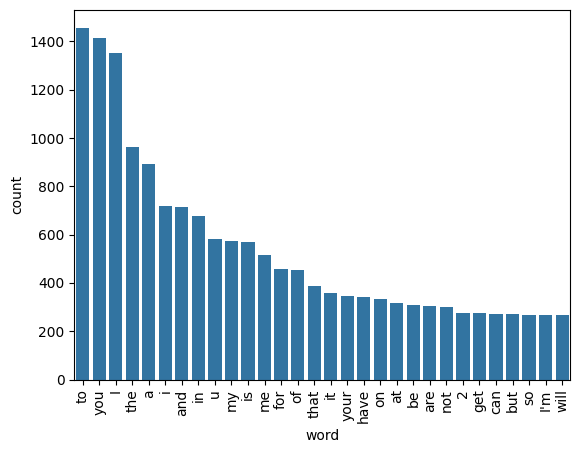

In [ ]:
from collections import Counter
import pandas as pd
spamm_wordss_countss=pd.DataFrame(Counter(ham_corpus).most_common(30),columns=['word','count'])
sns.barplot(x='word',y='count',data=spamm_wordss_countss)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df.head()

,Target,Msg,num_char,num_word,num_sen,transform_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...,29,8,2,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfid=TfidfVectorizer(max_features=3000)

In [ ]:
X=tfid.fit_transform(df['transform_message']).toarray()

In [ ]:
X.shape

(5157, 3000)

In [ ]:
Y=df['Target'].values

In [ ]:
Y


array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
y_pred1 = gnb.predict(X_test)
print("Gaussian Naive Bayes:")
print("Accuracy:", accuracy_score(Y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred1))
print("Precision:", precision_score(Y_test, y_pred1))
print()

Gaussian Naive Bayes:
Accuracy: 0.8953488372093024
Confusion Matrix:
 [[810  95]
 [ 13 114]]
Precision: 0.5454545454545454



In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)
y_pred2 = mnb.predict(X_test)
print("Multinomial Naive Bayes:")
print("Accuracy:", accuracy_score(Y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred2))
print("Precision:", precision_score(Y_test, y_pred2))
print()

Multinomial Naive Bayes:
Accuracy: 0.9767441860465116
Confusion Matrix:
 [[905   0]
 [ 24 103]]
Precision: 1.0



In [ ]:
bnb = BernoulliNB()
bnb.fit(X_train, Y_train)
y_pred3 = bnb.predict(X_test)
print("Bernoulli Naive Bayes:")
print("Accuracy:", accuracy_score(Y_test, y_pred3))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred3))
print("Precision:", precision_score(Y_test, y_pred3))
print()

Bernoulli Naive Bayes:
Accuracy: 0.9864341085271318
Confusion Matrix:
 [[905   0]
 [ 14 113]]
Precision: 1.0



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [ ]:
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}


In [ ]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision


In [ ]:
train_classifier(svc, X_train, Y_train, X_test, Y_test)


(0.9796511627906976, 0.9732142857142857)

In [ ]:
model_accuracy_scores = []
model_precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(
        clf, X_train, Y_train, X_test, Y_test
    )

    print('For', name)
    print('Accuracy:', current_accuracy)
    print('Precision:', current_precision)
    print()

    model_accuracy_scores.append(current_accuracy)
    model_precision_scores.append(current_precision)

For SVC
Accuracy: 0.9796511627906976
Precision: 0.9732142857142857

For KN
Accuracy: 0.9098837209302325
Precision: 1.0

For NB
Accuracy: 0.9767441860465116
Precision: 1.0

For DT
Accuracy: 0.9486434108527132
Precision: 0.8775510204081632

For LR
Accuracy: 0.9534883720930233
Precision: 0.9072164948453608

For RF
Accuracy: 0.9777131782945736
Precision: 1.0

For AdaBoost
Accuracy: 0.9467054263565892
Precision: 0.9285714285714286

For BgC
Accuracy: 0.9680232558139535
Precision: 0.9351851851851852

For ETC
Accuracy: 0.9835271317829457
Precision: 1.0

For GBDT
Accuracy: 0.9554263565891473
Precision: 0.945054945054945

For xgb
Accuracy: 0.9767441860465116
Precision: 0.9904761904761905



In [ ]:
performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy': model_accuracy_scores,
    'Precision': model_precision_scores
}).sort_values('Precision', ascending=False)

In [ ]:
performance_df


,Algorithm,Accuracy,Precision
1,KN,0.909884,1.000000
2,NB,0.976744,1.000000
5,RF,0.977713,1.000000
8,ETC,0.983527,1.000000
10,xgb,0.976744,0.990476
0,SVC,0.979651,0.973214
9,GBDT,0.955426,0.945055
7,BgC,0.968023,0.935185
6,AdaBoost,0.946705,0.928571
4,LR,0.953488,0.907216


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars='Algorithm')

In [ ]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.909884
1,NB,Accuracy,0.976744
2,RF,Accuracy,0.977713
3,ETC,Accuracy,0.983527
4,xgb,Accuracy,0.976744
5,SVC,Accuracy,0.979651
6,GBDT,Accuracy,0.955426
7,BgC,Accuracy,0.968023
8,AdaBoost,Accuracy,0.946705
9,LR,Accuracy,0.953488


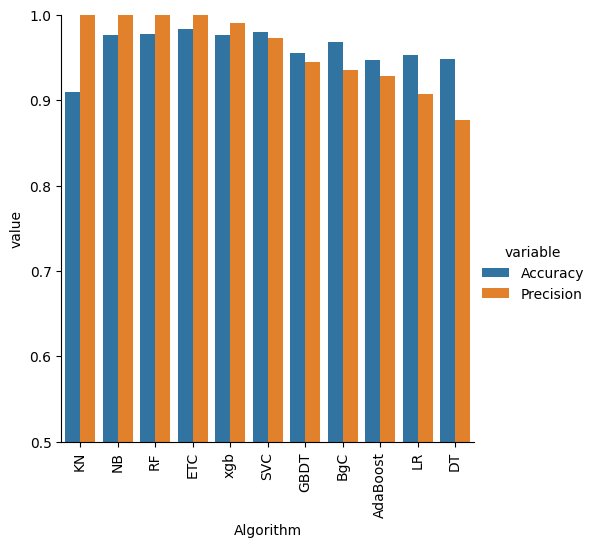

In [ ]:
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
temp_df=performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy_max_ft_3000': model_accuracy_scores,
    'Precision_max_ft_3000': model_precision_scores
}).sort_values('Precision_max_ft_3000', ascending=False)

In [ ]:
temp_df=performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy_scaling': model_accuracy_scores,
    'Precision_scaling': model_precision_scores
}).sort_values('Precision_scaling', ascending=False)

In [ ]:
new_df=performance_df.merge(temp_df,on='Algorithm')

In [ ]:
new_df_scaled=new_df.merge(temp_df,on='Algorithm')

In [ ]:
new_df_scaled

,Algorithm,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_scaling,Precision_scaling
0,KN,0.909884,1.000000,0.909884,1.000000,0.909884,1.000000
1,NB,0.976744,1.000000,0.976744,1.000000,0.976744,1.000000
2,RF,0.977713,1.000000,0.977713,1.000000,0.977713,1.000000
3,ETC,0.983527,1.000000,0.983527,1.000000,0.983527,1.000000
4,xgb,0.976744,0.990476,0.976744,0.990476,0.976744,0.990476
5,SVC,0.979651,0.973214,0.979651,0.973214,0.979651,0.973214
6,GBDT,0.955426,0.945055,0.955426,0.945055,0.955426,0.945055
7,BgC,0.968023,0.935185,0.968023,0.935185,0.968023,0.935185
8,AdaBoost,0.946705,0.928571,0.946705,0.928571,0.946705,0.928571
9,LR,0.953488,0.907216,0.953488,0.907216,0.953488,0.907216


In [ ]:
svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [ ]:
voting.fit(X_train,Y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
VotingClassifier(estimators=[('svm',SVC(gamma=1.0, kernel='sigmoid',probability=True)),('nb',MultinomialNB()),('et',ExtraTreesClassifier(n_estimators=50, random_state=2))],voting='soft')

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

voting.fit(X_train,Y_train)

y_pred=voting.predict(X_test)
print('Accuracy',accuracy_score(Y_test,y_pred))
print('Precision',precision_score(Y_test,y_pred))

Accuracy 0.9864341085271318
Precision 1.0


In [ ]:
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimators=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier
clf=StackingClassifier(estimators=estimators,final_estimator=final_estimators)
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
print('Accuracy',accuracy_score(Y_test,y_pred))
print('Precision',precision_score(Y_test,y_pred))

Accuracy 0.9874031007751938
Precision 0.975
